# Módulo Visualização de Dados:
Leia o arquivo ecommerce_preparados.csv’ dentro de um dataframe  

Faça uma análise detalhada dos dados, descubra quais dados gostaria de destacar e crie os seguintes gráficos:


*   1 Gráfico de dispersão
*   1 Mapa de calor
*   1 Gráfico de barra
*   1 Gráfico de pizza
*   1 Gráfico de densidade

Adicione títulos nos gráficos e nos eixos para ficar claro os objetivos dos gráficos.

Fiquem a vontade para escolher a biblioteca que quiserem, não esqueçam de comentar os códigos.
Essa atividade é um pouco diferente, vocês terão que construir os códigos nesse arquivo e enviar ou o arquivo ou o link do github com o arquivo publicado para os tutores.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
df = pd.read_csv('D:\OneDrive - UFRGS\Área de Trabalho\ebac\ecommerce_preparados.csv')
print(df.head(15).to_string())

    Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto                            Marca                Material               Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Review1                                                                                                                                                                                                                                                                                              

Tratamento dos dados nulos

In [4]:
#Mostrando os nulos
print(df.isnull().sum())

Unnamed: 0                0
Título                    0
Nota                    640
N_Avaliações            640
Desconto               1325
Marca                     0
Material                867
Gênero                   79
Temporada                 0
Review1                 684
Review2                 845
Review3                 966
Qtd_Vendidos              0
Preço                   235
Nota_MinMax             640
N_Avaliações_MinMax     640
Desconto_MinMax        1325
Preço_MinMax            235
Marca_Cod                 0
Material_Cod              0
Temporada_Cod             0
Qtd_Vendidos_Cod        226
Marca_Freq                0
Material_Freq           867
dtype: int64


Eliminando os dados nulos

In [5]:
df = df.dropna()
print(df.isnull().sum())

Unnamed: 0             0
Título                 0
Nota                   0
N_Avaliações           0
Desconto               0
Marca                  0
Material               0
Gênero                 0
Temporada              0
Review1                0
Review2                0
Review3                0
Qtd_Vendidos           0
Preço                  0
Nota_MinMax            0
N_Avaliações_MinMax    0
Desconto_MinMax        0
Preço_MinMax           0
Marca_Cod              0
Material_Cod           0
Temporada_Cod          0
Qtd_Vendidos_Cod       0
Marca_Freq             0
Material_Freq          0
dtype: int64


Text(0, 0.5, 'Quantidade')

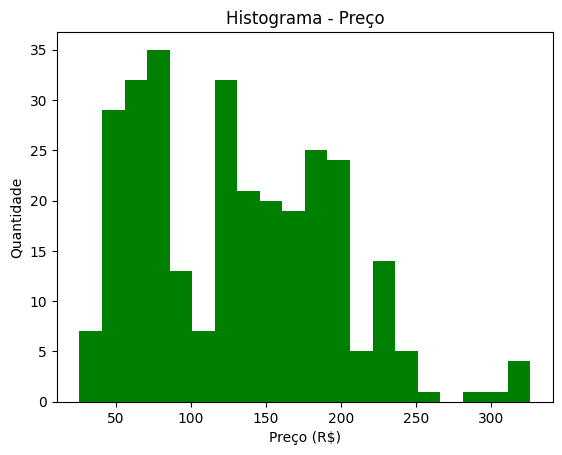

In [6]:
plt.hist(df['Preço'], bins = 20, color = 'green')
plt.title('Histograma - Preço')
plt.xlabel('Preço (R$)')
plt.ylabel('Quantidade')

Aqui eu verifico se existe uma relação entre o preço e a quantidade de produtos comprados pensando que poderia haver uma tendência à produtos mais baratos. Porém, o histograma apresenta dois picos, o que demonstra que não existe a relação imaginada. Os produtos entre R$50 - 100 foram bastante comprados mas os entre R$ 120 - 200 também foram 

Text(0, 0.5, 'Quantidade')

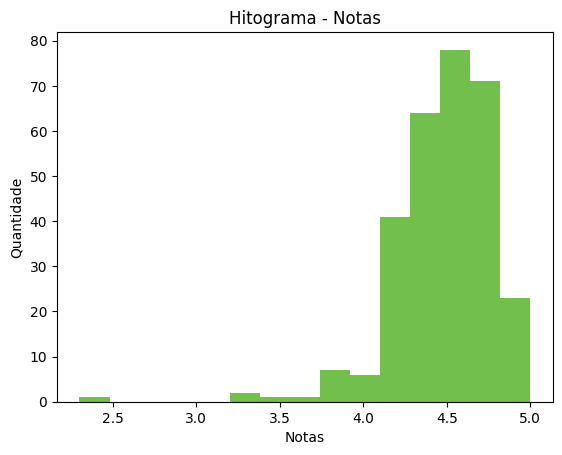

In [7]:
plt.hist(df['Nota'], bins = 15, color = '#72bf4e')
plt.title('Hitograma - Notas')
plt.xlabel('Notas')
plt.ylabel('Quantidade')

O histograma para as notas mostra que a maior parte das notas foram altas, entre 4.0 e 5.0 com uma curva que fica deslocada para a direita

Text(0, 0.5, 'Preço (R$)')

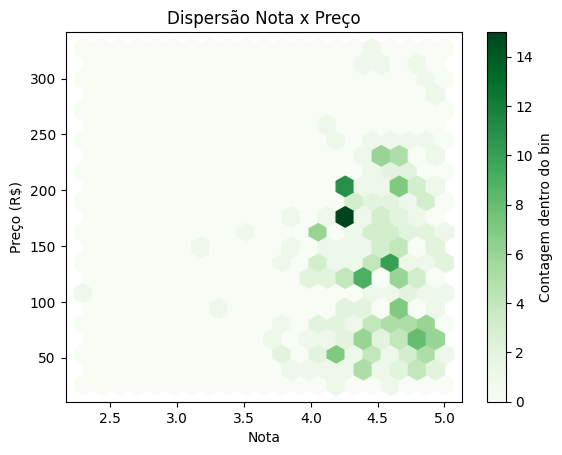

In [8]:
plt.hexbin(df['Nota'], df['Preço'], gridsize =  20, cmap = 'Greens')
plt.colorbar(label='Contagem dentro do bin')
plt.title('Dispersão Nota x Preço')
plt.xlabel('Nota')
plt.ylabel('Preço (R$)')

Aqui eu tento verificar também se existe alguma relação ou tendência na nota em que as pessoas dão a partir do preço. O gráfico de dispersão está muito disperso e mostra que não existe uma correlação forte para esse caso.

In [9]:
print(df.dtypes)

Unnamed: 0               int64
Título                  object
Nota                   float64
N_Avaliações           float64
Desconto               float64
Marca                   object
Material                object
Gênero                  object
Temporada               object
Review1                 object
Review2                 object
Review3                 object
Qtd_Vendidos            object
Preço                  float64
Nota_MinMax            float64
N_Avaliações_MinMax    float64
Desconto_MinMax        float64
Preço_MinMax           float64
Marca_Cod                int64
Material_Cod             int64
Temporada_Cod            int64
Qtd_Vendidos_Cod       float64
Marca_Freq             float64
Material_Freq          float64
dtype: object


<Axes: >

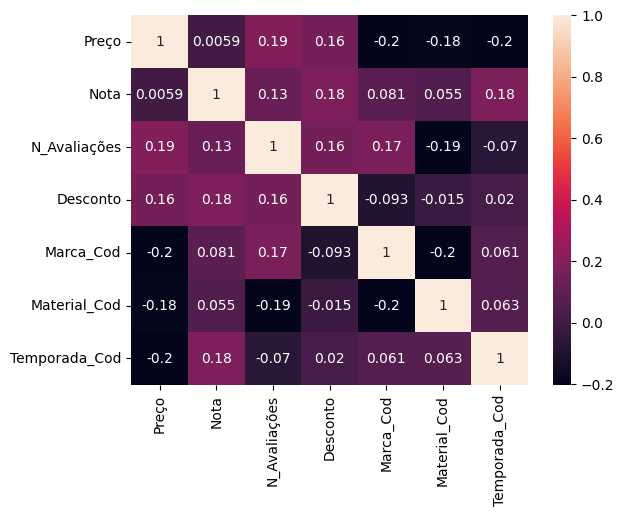

In [10]:
df_corr = df[['Preço','Nota','N_Avaliações','Desconto','Marca_Cod','Material_Cod','Temporada_Cod']].corr()

sns.heatmap(df_corr, annot = True)

Com o mapa de calor, eu tento verificar a correlação entre os dados quantitativos do dataframe. Percebe-se que a correlação mais forte é de 0.2 ou 20%, o que não é muito significativo.

Index(['Masculino', 'Feminino', 'Sem gênero', 'Meninos', 'Meninas',
       'Sem gênero infantil', 'Bebês', 'Unissex',
       'roupa para gordinha pluss P ao 52'],
      dtype='object', name='Gênero')
Index(['Masculino', 'Feminino', 'Sem gênero', 'Meninos', 'Meninas'], dtype='object', name='Gênero')
[129 114  25  13   6   4   2   1   1]
[129 114  25  13   6]


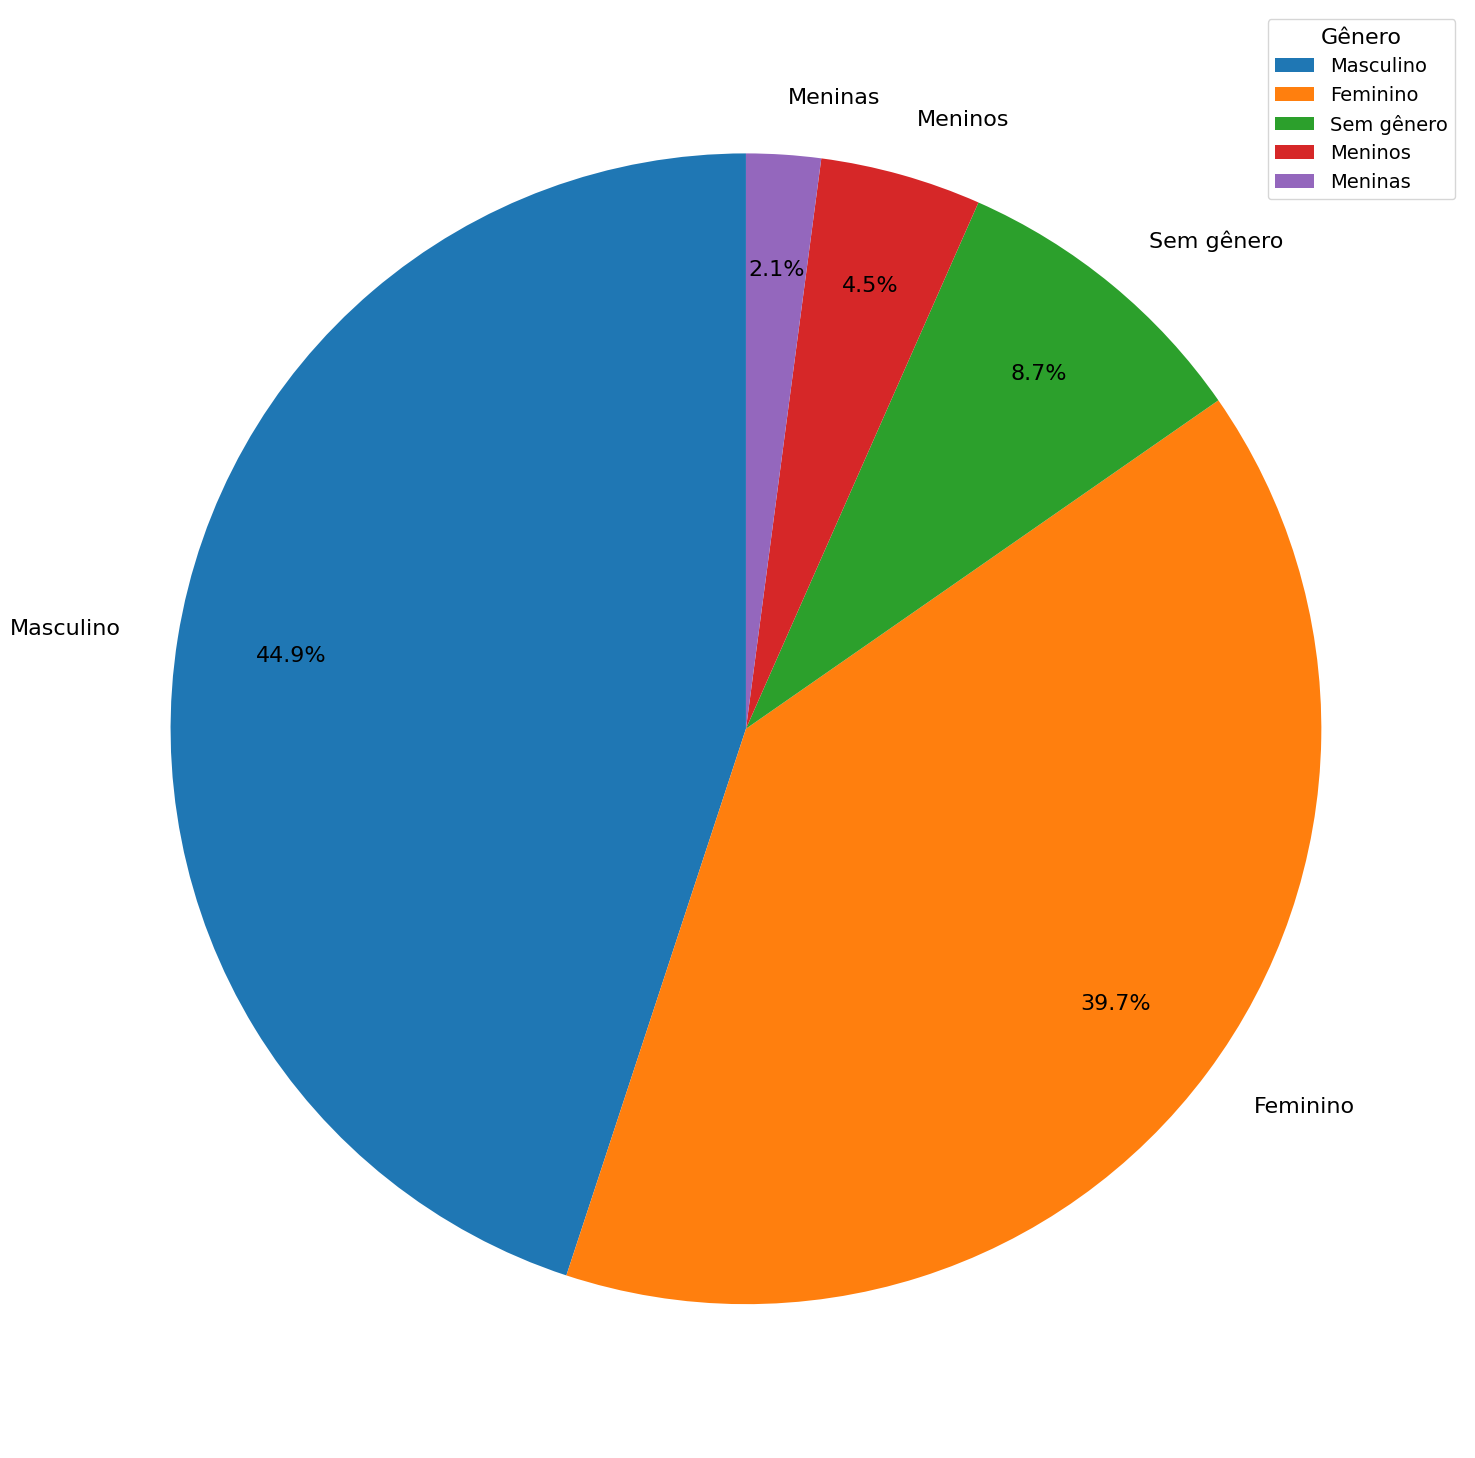

In [ ]:
x = df['Gênero'].value_counts().index
print(x)
xx = x.drop(['Sem gênero infantil', 'Bebês', 'Unissex','roupa para gordinha pluss P ao 52'])
print(xx)
y = df['Gênero'].value_counts().values
print(y)
yy = y[:5]
print(yy)

plt.figure(figsize=(15,15))
plt.pie(
    yy, 
    labels=xx, 
    autopct='%.1f%%', 
    pctdistance=0.8, 
    startangle=90, 
    textprops={'fontsize': 16}  # Ajuste o tamanho da fonte aqui
)
#plt.tick_params(axis='x', rotation = 180)
plt.legend(
    title='Gênero', 
    title_fontsize=16,  # Tamanho da fonte do título da legenda
    prop={'size': 14}   # Tamanho da fonte dos itens da legenda
)
plt.tight_layout()



O gráfico de pizza permite enxergar os Gêneros que foram mais adquiridos. Para gerar tal gráfico tive que deixar de lado os gêneros que tinham menor expressão pois as fatias do gráfico ficavam muito pequenas e o texto acabava ficando um por cima do outro também.

<function matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

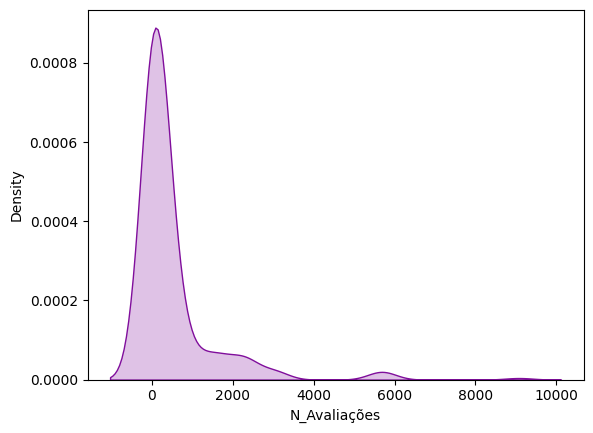

In [12]:
sns.kdeplot(df['N_Avaliações'], fill=True, color = '#800e9c')
plt.title('')
plt.ylabel

O gráfico de densidade para N_Avaliações mostra que a maior concentração de produtos avaliados recebeu até 2000 avaliações.

Index(['Unnamed: 0', 'Título', 'Nota', 'N_Avaliações', 'Desconto', 'Marca',
       'Material', 'Gênero', 'Temporada', 'Review1', 'Review2', 'Review3',
       'Qtd_Vendidos', 'Preço', 'Nota_MinMax', 'N_Avaliações_MinMax',
       'Desconto_MinMax', 'Preço_MinMax', 'Marca_Cod', 'Material_Cod',
       'Temporada_Cod', 'Qtd_Vendidos_Cod', 'Marca_Freq', 'Material_Freq'],
      dtype='object')


Text(0.5, 0, 'Qtde_Vendidos')

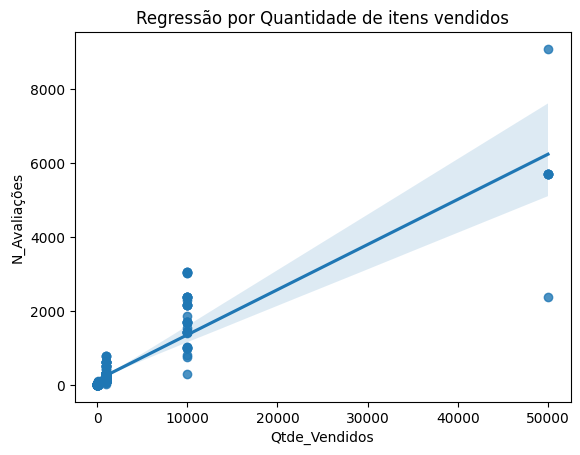

In [13]:
print(df.columns)
sns.regplot(y = 'N_Avaliações', x= 'Qtd_Vendidos_Cod', data = df)
plt.title('Regressão por Quantidade de itens vendidos')
plt.xlabel('Qtde_Vendidos')

O gráfico de regressão foi o mais difícil de todos para criar uma relação que fosse relevante. O gráfico acima está mostrando a tendência natural que imaginaríamos de quanto mais itens temos vendidos maior também será o número de avaliações, naturalmente. 